<a href="https://colab.research.google.com/github/Aditya-Karanth/Machine-Learning/blob/master/Projects/SMS%20Spam%20Classifier%20(NLP)/SMS%20Spam%20Classifier%20(100%25%20Accuracy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1><div align="center">SMS Spam Classifier </div></h1>**


---

**<h2>Problem Statement: </h2>** 

> To classify a new text message provided by a user is **spam** or **not spam**.

&nbsp;

**Data Link**: [UCI SMS Spam Collection Data Set](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection/) [5572 Documents]

***Keywords:*** *make_pipeline, CountVectorizer, TfidfTransformer, LogisticRegression, MultinomialNB, stop_words*

---

**<h2>Project Planning :</h2>** 


### **1. Gathering Data**
- **Imports -** 
  - Contains all the imports necessary for reading data, visualizations and model buiding and evaluating.
- Extracting zip files from downloaded UCI dataset.


### **2. Exploring Data**
- Understand the nature of the data .info() .describe()
- Understand the Distribution of target labels.
- Obtaining insights on the new column 'length', spam and ham messages, and their relation via graphs


### **3. Model Building**
- Data is split in to *train* and *test* messages .
- Text Messages are first converted in to Bag-of-words representation using *CountVectorizer* and *TfidfTransformer*, then to a Model.

- **Pipeline -** 
  - Deploying a Pileline, constructed using below three steps.

  1. **Count Vectorizer -**
    - Remove common English words using *stop_words*.
    - **Tokenization**: Splits each document into the words that appear in it on whitespace and punctuation.
    - **Vocabulary building**: Collect a vocabulary of all words that appear in any of the documents, and numbers them.

  2. **Tf-idf Transformer -** 
    - Takes in the sparse matrix output produced by Count Vectorizer and transforms it by giving high weight to any term that appears often in a particular document, but not in many documents in the corpus.

  3. **Model -**
    - *Logistic Regression* and *Multinomial Naive Bayes* Classifiers to classify messages (tf-idf sparse matrix) in to Spam or Ham 


- **GridSearchCV -**
  - Deploying a grid search using Pipeline, Parameters to adjust, with Cross-Validation of 5 folds.
  - Fitting the created grid with train data and obtaining the Best cross-validation score and Best Parameters

- Exploring created Vocabulary, Stop Words, TFIDF Vocabulary

### **4. Predictions and Evaluation**
  - Predictions on test text data.
  - Evaluation of model with classification report and confusion matrix.

### **5. New SMS Classifier Prediction for User** 
  - Building a complete model with best parameters and best estimator obtained from GridSearchCV on whole dataset (X and y) without splitting.
  - Developing a function '*classify*', to classify any user provided message in to spam or not spam.
  - Previlage for user to input any text message and Check model predictions on SMS.

---

Solution by     : **Aditya Karanth**.

GitHub Profile  : https://github.com/Aditya-Karanth

Kaggle Profile  : https://www.kaggle.com/adityakaranth

LinkedIn Profile: https://www.linkedin.com/in/u-aditya-karanth-2206/

# Imports


In [1]:
import numpy as np
import pandas as pd
import string

# Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import make_pipeline 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context('notebook')
matplotlib.rcParams['figure.figsize'] = (12,8) 

In [2]:
# Extracting files from 'smsspamcollection' zip file

from zipfile import ZipFile

with ZipFile("smsspamcollection.zip", 'r') as z:
    # printing all the contents of the zip file
    z.printdir()
    # extracting all the files
    print('Extracting all the files now...')
    z.extractall()
    print('Done!')

File Name                                             Modified             Size
SMSSpamCollection                              2011-03-15 22:36:02       477907
readme                                         2011-04-18 14:53:56         5868
Extracting all the files now...
Done!


# Exploring Data

In [3]:
corpus = pd.read_csv('SMSSpamCollection', sep='\t', names=['label','message'])
corpus.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
corpus.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
corpus.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [7]:
# Checking a random message at row 13
print('Length of Message: {}\n Message: {}'.format(len(corpus['message'][13]), corpus['message'][13]))

Length of Message: 196
 Message: I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ham     4825
spam     747
Name: label, dtype: int64

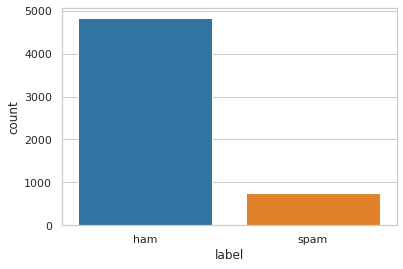

In [8]:
# Distribution of labels in data
sns.countplot(corpus['label'])
display(corpus['label'].value_counts())

# Ham messages are 4825 and Spam are 747, i.e Imbalanced dataset

In [9]:
# Adding 'length' column to corpus
corpus['length'] = corpus['message'].apply(len)
corpus

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [10]:
corpus['length'].describe()
# Messages with minimum length is 2 and maximum length of 910

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [11]:
# Minimum length message

print('min_mess: \n\n')
corpus[corpus['length']==2]['message'].iloc[:]

min_mess: 




1925    Ok
3051    Ok
4498    Ok
5357    Ok
Name: message, dtype: object

In [12]:
# Maximum length message

print('max_mess: \n') 
corpus[corpus['length']==910]['message'].iloc[0]

max_mess: 



"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [13]:
# Average lengths of ham and spam

corpus.groupby('label').mean()['length']

label
ham      71.482487
spam    138.670683
Name: length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd62603450>,
      dtype=object)

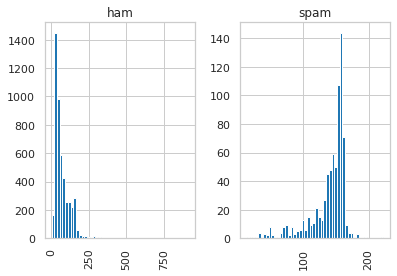

In [14]:
# Distribution of spam and ham messages length

corpus.hist(column='length', by='label', bins=50)

# Model Building

In [15]:
# Splitting data in to train and test messages

X = corpus['message']
y = corpus['label']
text_train, text_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22) 

Two classifiers are considered for classifying high-dimensional, sparse data:
- Logistic Regression
- Multinomial Naive Bayes (selected)

## Logistic Regression

In [16]:
# PIPELINE [tf–idf actually makes use of the statistical properties of the training data]
pipe_lr = make_pipeline(CountVectorizer(stop_words='english'), #   (Tokenization, Vocabulary building)
                        TfidfTransformer(), # Transforms sparse matrix output produced by CountVectorizer(Uses L2 normalization)
                        LogisticRegression(max_iter=1000)) # Model to classify spam/ham

# parameters for grid search
param_grid_lr = {'countvectorizer__ngram_range' : [(1,1), (1,2)], # Combination of words to consider
                 'countvectorizer__min_df' : [1,2,3], # Minimum appearence in documents
                 'logisticregression__C' : [0.1,1,10,100,1000]} # Regularization Parameter


# GRID SEARCH (using pipeline and param_grid along with cross-validation)
grid_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=5, n_jobs=-1)

# Fit train data to grid
grid_lr.fit(text_train, y_train)

print('Best cross-validation score : {:.2f}\n'.format(grid_lr.best_score_))
print('Best Parameters: ', grid_lr.best_params_)

Best cross-validation score : 0.98

Best Parameters:  {'countvectorizer__min_df': 2, 'countvectorizer__ngram_range': (1, 2), 'logisticregression__C': 100}


## Multinomial Naive-Bayes

In [17]:
# PIPELINE [tf–idf actually makes use of the statistical properties of the training data]
pipe_nb = make_pipeline(CountVectorizer(stop_words='english'), # Bag-of-words (Tokenization, Vocabulary building)
                     TfidfTransformer(), # Transforms sparse matrix output produced by CountVectorizer(Uses L2 normalization)
                     MultinomialNB()) # Model to classify spam/ham

# parameters for grid search
param_grid_nb = {'countvectorizer__ngram_range' : [(1,1), (1,2)], # Combination of words to consider
              'countvectorizer__min_df' : [1,2,3], # Minimum appearence in documents
              'multinomialnb__alpha' : [0.001,0.01,0.1,1,10]} # Regularization Parameter

# GRID SEARCH (using pipeline and param_grid along with cross-validation)
grid_nb = GridSearchCV(pipe_nb, param_grid_nb, cv=5, n_jobs=-1)

# Fit train data to grid
grid_nb.fit(text_train, y_train)

print('Best cross-validation score : {:.2f}\n'.format(grid_nb.best_score_))
print('Best Parameters: ', grid_nb.best_params_)


Best cross-validation score : 0.99

Best Parameters:  {'countvectorizer__min_df': 1, 'countvectorizer__ngram_range': (1, 2), 'multinomialnb__alpha': 0.1}


Both models performs almost simillarly on this data, Choosing **Multinomial Naive Bayes**

In [18]:
# Cross validation mean scores
grid_nb.cv_results_['mean_test_score']

array([0.97974359, 0.98102564, 0.98461538, 0.96589744, 0.86435897,
       0.98230769, 0.98410256, 0.98512821, 0.95333333, 0.86435897,
       0.98076923, 0.98153846, 0.9825641 , 0.97564103, 0.86717949,
       0.98307692, 0.98384615, 0.98461538, 0.96846154, 0.86435897,
       0.97948718, 0.98128205, 0.98179487, 0.97948718, 0.87384615,
       0.98230769, 0.98307692, 0.98358974, 0.97512821, 0.86641026])

In [19]:
# Best Estimator
grid_nb.best_estimator_

Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidftransformer',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('multinomialnb',
                 MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True))],
         verbose=False)

In [20]:
# Count Vectorizer
vect = grid_nb.best_estimator_.named_steps["countvectorizer"]

# Vocabulary
print('len of vocabulary : ',len(vect.vocabulary_))
print('Every 500th vocabulary:\n', vect.get_feature_names()[::1000])

# Stop Words
print('\nlen of stop words : ',len(vect.get_stop_words()))
print('\nstop words : ',vect.get_stop_words())

len of vocabulary :  28452
Every 500th vocabulary:
 ['00', '35p', 'ah okie', 'bad character', 'bslvyl', 'claim free', 'credit receive', 'diff guess', 'emailed', 'flies room', 'god power', 'half let', 'hot mail', 'journey let', 'left early', 'love ass', 'min term', 'needle', 'orange line', 'plz don', 'real sense', 'sale', 'si think', 'starting issue', 'telly', 'told car', 'ur med', 'way friendship', 'xavier decided']

len of stop words :  318

stop words :  frozenset({'much', 'could', 'done', 'him', 'show', 'when', 'part', 'against', 'put', 'more', 'those', 'ie', 'can', 'another', 'otherwise', 'since', 'now', 'whole', 'forty', 'ours', 'her', 'they', 'be', 'sixty', 'i', 'often', 'seeming', 'twenty', 'whereafter', 'mostly', 'own', 'have', 'becomes', 'interest', 'ourselves', 'we', 'same', 'already', 'five', 'beside', 'full', 'what', 'whenever', 'found', 'move', 'above', 'herein', 'meanwhile', 'everyone', 'whereby', 'and', 'she', 'whose', 'becoming', 'cry', 'inc', 'whence', 'them', 'amoungs

In [21]:
# Tf-idf Transformer
tfidf = grid_nb.best_estimator_.named_steps["tfidftransformer"]

print('len of vocabulary : ',len(tfidf.idf_))

print('\nIDF of word "phone" is', tfidf.idf_[vect.vocabulary_['phone']])
print('IDF of word "cat" is', tfidf.idf_[vect.vocabulary_['cat']])

len of vocabulary :  28452

IDF of word "phone" is 4.912279382817065
IDF of word "cat" is 7.882693848386766


# Predictions and Evaluation

In [22]:
y_pred_nb = grid_nb.predict(text_test)

print('Test Score: {:.3f}'.format(grid_nb.score(text_test, y_test)))

print('\nConfusion Matrix: \n', confusion_matrix(y_test, y_pred_nb))
print('\nClassification Report: \n', classification_report(y_test, y_pred_nb))

Test Score: 0.987

Confusion Matrix: 
 [[1452    2]
 [  19  199]]

Classification Report: 
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1454
        spam       0.99      0.91      0.95       218

    accuracy                           0.99      1672
   macro avg       0.99      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672



# **New SMS Classifier Prediction for User**

Re-Modelling

In [23]:
# MultinomialNB model using the best parameters and complete data (messages)
pipe = make_pipeline(CountVectorizer(stop_words='english', ngram_range=(1,2)),
                     TfidfTransformer(),
                     MultinomialNB(alpha=0.1))
model = pipe.fit(X,y)
print('Final Score - ',model.score(X, y))

Final Score -  1.0


Function to classify any user provided message

In [24]:
def classify(x):
  pred = model.predict([x])
  return "This is a Spam message" if pred[0]=='spam' else "This is not a Spam message"

--> Type any new text in `message = '___' ` and Run

In [25]:
# This is a new message out of dataset
message = 'Our records show that you overpaid for (a product or service). Kindly supply your bank routing and account number to receive your refund.'

classify(message)

'This is a Spam message'

In [26]:
message = 'Hey, hope you are doing well and sound'

classify(message)

'This is not a Spam message'

In [27]:
# This is a new message out of dataset
message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

classify(message)

'This is a Spam message'